<p align="center">
<img src="https://i0.wp.com/cimtrajalisco.org/wp-content/uploads/2019/02/Logo_Horizontal-1024x472.jpg" title="Logo ITESO" width="600" height="450">
</p>

# Proyecto Final

**Profesor: Esteban Jiménez**

Integrantes:
* <font color= ""> `Paloma Rodríguez Medel  if721416`</font>
* <font color= ""> `Jose Tonatiuh Navarro Silva   if722399`</font>
* <font color= ""> `Carlos Cuevas Mendoza       if715890`</font>

# Introducción

## <font color=blue> Elección de activos </font>

Decidimos trabajar únicamente con acciones de empresas particulares, todos obtenidos de [Yahoo finance](https://finance.yahoo.com/), listadas a continuación y divididas en sus respectivos sectores:



# Desarrollo

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import minimize 

## <font color=blue> Selección de portafolios </font>


Una vez elegidos los activos, asumimos un coeficiente de aversion al riesgo de <font color=orange>**10**</font> para diseñar distintos portafolios durante 6 años

AAPL- Apple Inc.


 ### <font color=green>PORTAFOLIO1 - 2016</font>

In [2]:
def get_adj_closes(tickers, start_date=None, end_date=None, freq='m'):
    closes = web.YahooDailyReader(symbols=tickers, start=start_date, end=end_date, interval=freq).read()['Adj Close']
    closes.sort_index(inplace=True)
    return closes

In [18]:
closes1 = get_adj_closes(tickers = ['AAPL','MSFT','GOOG','AMZN','TSLA','FB','GE','JPM','HD','JNJ','WMT','BAC','NFLX','PFE',
                                  'DIS','KO','CSCO','VZ','INTC','MCD','T','C','BA','IBM','GM'],
                        start_date = '2010-01-01',
                        end_date='2015-12-31')

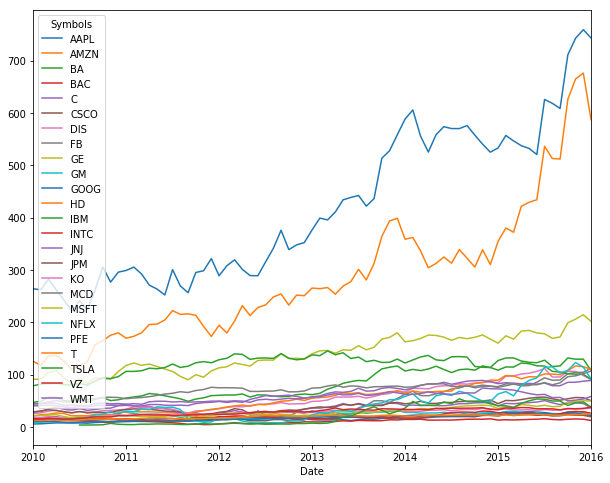

In [19]:
closes1.plot(figsize=(10,8))

In [20]:
ret1=(closes1.pct_change()).dropna()

In [21]:
Eret1 = pd.DataFrame(data={'Media':ret1.mean()*12,
                                'Volatilidad':ret1.std()*np.sqrt(12)},
                           index=ret1.columns)

In [22]:
cov1=ret1.cov()
corr1=ret1.corr()

In [23]:
Eret1=Eret1.T
#Tasa libre de riesgo certificados de tesorería a un año reportados en la página de Departamento de tesorería de los EEUU el
#dia 16 de diciembre de 2015
rf = 0.0050

# Matriz cov
S= np.diag(Eret1.loc['Volatilidad'].values)
Sigma=S.dot(corr1).dot(S)

#Rendimientos esperados activos
Eind=Eret1.loc['Media'].values

In [24]:
def var(w, Sigma):
    return w.dot(Sigma).dot(w)
def menos_RS(w,Eind,rf,Sigma):
    E_port=Eind.T.dot(w)
    s_port=var(w,Sigma)**0.5
    RS=(E_port-rf)/s_port
    return -RS

In [25]:
N=len(Eind)
#Dato inicial
w0= np.ones(N)/N
# Cotas de las variables
bnds=((0,1), )*N
# Restricciones
cons = {'type':'eq', 'fun':lambda w: w.sum() - 1}

In [26]:
emv=minimize(fun=menos_RS,
            x0=w0,
            args=(Eind,rf,Sigma),
            bounds=bnds,
            constraints=cons)

In [27]:
w_emv=emv.x
E_emv=Eind.T.dot(w_emv)
s_emv=var(w_emv,Sigma)**0.5
RS_emv=(E_emv-rf)/s_emv

In [28]:
g=10
w_opt=(E_emv-rf)/(g*s_emv**2)
w_opt*w_emv,1-w_opt
Poemv=pd.DataFrame(data={'Pesos%':w_opt*w_emv*100},index=ret1.columns)
Poemv=Poemv.round(4)
Poemv[Poemv['Pesos%']!=0]

,Pesos%
Symbols,
FB,11.7987
GOOG,23.9108
HD,55.4572
JNJ,27.6323
MCD,20.2405
MSFT,9.3298
NFLX,12.9471
T,34.6055
TSLA,12.1961


In [29]:
a1=(1-w_opt)*100
a1

-113.22294022744752

 ### <font color=green>PORTAFOLIO 2 - 2017</font>

In [32]:
closes2 = get_adj_closes(tickers = ['AAPL','MSFT','GOOG','AMZN','TSLA','FB','GE','JPM','HD','JNJ','WMT','BAC','NFLX','PFE',
                                  'DIS','KO','CSCO','VZ','INTC','MCD','T','C','BA','IBM','GM'],
                        start_date = '2011-01-01',
                        end_date='2016-12-31')

In [33]:
ret2=(closes2.pct_change()).dropna()

In [34]:
Eret2 = pd.DataFrame(data={'Media':ret2.mean()*12,
                                'Volatilidad':ret2.std()*np.sqrt(12)},
                           index=ret2.columns)

In [35]:
cov2=ret2.cov()
corr2=ret2.corr()

In [36]:
Eret2=Eret2.T
#Tasa libre de riesgo certificados de tesorería a un año reportados en la página de Departamento de tesorería de los EEUU el
#dia 14 de diciembre de 2016
rf2 = 0.005

# Matriz cov
S2= np.diag(Eret2.loc['Volatilidad'].values)
Sigma2=S2.dot(corr2).dot(S2)

#Rendimientos esperados activos
Eind2=Eret2.loc['Media'].values

In [37]:
def var(w, Sigma2):
    return w.dot(Sigma2).dot(w)
def menos_RS(w,Eind2,rf2,Sigma2):
    E_port2=Eind2.T.dot(w)
    s_port2=var(w,Sigma2)**0.5
    RS2=(E_port2-rf2)/s_port2
    return -RS2

In [38]:
N2=len(Eind2)
#Dato inicial
w0= np.ones(N2)/N2
# Cotas de las variables
bnds=((0,1), )*N2
# Restricciones
cons = {'type':'eq', 'fun':lambda w: w.sum() - 1}

In [39]:
emv2=minimize(fun=menos_RS,
            x0=w0,
            args=(Eind2,rf2,Sigma2),
            bounds=bnds,
            constraints=cons)

In [40]:
w_emv2=emv2.x
E_emv2=Eind2.T.dot(w_emv2)
s_emv2=var(w_emv2,Sigma2)**0.5
RS_emv2=(E_emv2-rf2)/s_emv2

In [41]:
w_opt2=(E_emv2-rf2)/(g*s_emv2**2)
w_opt2*w_emv2,1-w_opt2
Poemv2=pd.DataFrame(data={'Pesos%':w_opt2*w_emv2*100},index=ret2.columns)
Poemv2=Poemv2.round(4)
Poemv2[Poemv2['Pesos%']!=0]

,Pesos%
Symbols,
BA,14.1972
BAC,13.4934
FB,13.0795
GOOG,15.7146
HD,32.4272
JNJ,27.2944
JPM,6.4760
MSFT,3.2413
NFLX,17.2839


In [42]:
a2=(1-w_opt2)*100
a2

-114.23541890891245

 ### <font color=green>PORTAFOLIO 3 - 2018</font>

In [43]:
closes3 = get_adj_closes(tickers = ['AAPL','MSFT','GOOG','AMZN','TSLA','FB','GE','JPM','HD','JNJ','WMT','BAC','NFLX','PFE',
                                  'DIS','KO','CSCO','VZ','INTC','MCD','T','C','BA','IBM','GM'],
                        start_date = '2012-01-01',
                        end_date='2017-12-31')

In [44]:
ret3=(closes3.pct_change()).dropna()

In [45]:
Eret3 = pd.DataFrame(data={'Media':ret3.mean()*12,
                                'Volatilidad':ret3.std()*np.sqrt(12)},
                           index=ret3.columns)

In [46]:
cov3=ret3.cov()
corr3=ret3.corr()

In [47]:
Eret3=Eret3.T
#Tasa libre de riesgo certificados de tesorería a un año reportados en la página de Departamento de tesorería de los EEUU el
#dia 13 de diciembre de 2017
rf3 = 0.015

# Matriz cov
S3= np.diag(Eret3.loc['Volatilidad'].values)
Sigma3=S3.dot(corr3).dot(S3)

#Rendimientos esperados activos
Eind3=Eret3.loc['Media'].values

In [48]:
def var(w, Sigma3):
    return w.dot(Sigma3).dot(w)
def menos_RS(w,Eind3,rf3,Sigma3):
    E_port3=Eind3.T.dot(w)
    s_port3=var(w,Sigma3)**0.5
    RS3=(E_port3-rf3)/s_port3
    return -RS3

In [49]:
N=len(Eind3)
#Dato inicial
w0= np.ones(N)/N
# Cotas de las variables
bnds=((0,1), )*N
# Restricciones
cons = {'type':'eq', 'fun':lambda w: w.sum() - 1}

In [50]:
emv3=minimize(fun=menos_RS,
            x0=w0,
            args=(Eind3,rf3,Sigma3),
            bounds=bnds,
            constraints=cons)

In [51]:
w_emv3=emv3.x
E_emv3=Eind3.T.dot(w_emv3)
s_emv3=var(w_emv3,Sigma3)**0.5
RS_emv3=(E_emv3-rf3)/s_emv3

In [52]:
w_opt3=(E_emv3-rf3)/(g*s_emv3**2)
w_opt3*w_emv3,1-w_opt3
Poemv3=pd.DataFrame(data={'Pesos%':w_opt3*w_emv3*100},index=ret3.columns)
Poemv3=Poemv3.round(4)
Poemv3[Poemv3['Pesos%']!=0]

,Pesos%
Symbols,
AAPL,6.6523
BA,20.5074
BAC,7.1807
FB,13.4416
GOOG,10.5603
HD,37.3593
JNJ,36.9075
JPM,16.2401
MCD,26.9317


In [53]:
a3=(1-w_opt3)*100
a3

-153.49313770271783

 ### <font color=green>PORTAFOLIO 4 - 2019</font>

In [54]:
closes4 = get_adj_closes(tickers = ['AAPL','MSFT','GOOG','AMZN','TSLA','FB','GE','JPM','HD','JNJ','WMT','BAC','NFLX','PFE',
                                  'DIS','KO','CSCO','VZ','INTC','MCD','T','C','BA','IBM','GM'],
                        start_date = '2013-01-01',
                        end_date='2018-12-31')

In [37]:
ret4=(closes4.pct_change()).dropna()

In [38]:
Eret4 = pd.DataFrame(data={'Media':ret4.mean()*12,
                                'Volatilidad':ret4.std()*np.sqrt(12)},
                           index=ret4.columns)

In [39]:
cov4=ret4.cov()
corr4=ret4.corr()

In [40]:
Eret4=Eret4.T
#Tasa libre de riesgo certificados de tesorería a un año reportados en la página de Departamento de tesorería de los EEUU el
#dia 31 de diciembre de 2017
rf4 = 0.0176

# Matriz cov
S4= np.diag(Eret4.loc['Volatilidad'].values)
Sigma4=S4.dot(corr4).dot(S4)

#Rendimientos esperados activos
Eind4=Eret4.loc['Media'].values

In [41]:
def var(w, Sigma4):
    return w.dot(Sigma4).dot(w)
def menos_RS(w,Eind4,rf4,Sigma4):
    E_port4=Eind4.T.dot(w)
    s_port4=var(w,Sigma4)**0.5
    RS4=(E_port4-rf4)/s_port4
    return -RS4

In [42]:
N=len(Eind4)
#Dato inicial
w0= np.ones(N)/N
# Cotas de las variables
bnds=((0,1), )*N
# Restricciones
cons = {'type':'eq', 'fun':lambda w: w.sum() - 1}

In [43]:
emv4=minimize(fun=menos_RS,
            x0=w0,
            args=(Eind4,rf4,Sigma4),
            bounds=bnds,
            constraints=cons)

In [44]:
w_emv4=emv4.x
E_emv4=Eind4.T.dot(w_emv4)
s_emv4=var(w_emv4,Sigma4)**0.5
RS_emv4=(E_emv4-rf4)/s_emv4

In [45]:
w_opt4=(E_emv4-rf4)/(g*s_emv4**2)
w_opt4*w_emv4,1-w_opt4
Poemv4=pd.DataFrame(data={'Pesos%':w_opt4*w_emv4*100},index=ret4.columns)
Poemv4=Poemv4.round(4)
Poemv4[Poemv4['Pesos%']!=0]

,Pesos%
Symbols,
V,36.9483
NFLX,14.1905
T,34.1453
TMUS,9.0089
JNJ,42.2821
AAPL,8.4114
MSFT,9.0991
AMZN,15.2184
NKE,16.5235


In [46]:
a4=(1-w_opt4)*100
a4

-133.8212249091401

 ### <font color=green>PORTAFOLIO 5 - 2020</font>

In [56]:
closes5 =get_adj_closes(tickers = ['AAPL','MSFT','GOOG','AMZN','TSLA','FB','GE','JPM','HD','JNJ','WMT','BAC','NFLX','PFE',
                                  'DIS','KO','CSCO','VZ','INTC','MCD','T','C','BA','IBM','GM'],
                        start_date = '2014-01-01',
                        end_date='2019-12-31')

In [57]:
ret5=(closes5.pct_change()).dropna()

In [58]:
Eret5 = pd.DataFrame(data={'Media':ret5.mean()*12,
                                'Volatilidad':ret5.std()*np.sqrt(12)},
                           index=ret5.columns)

In [59]:
cov5=ret5.cov()
corr5=ret5.corr()

In [60]:
Eret5=Eret5.T
#Tasa libre de riesgo certificados de tesorería a un año reportados en la página de Departamento de tesorería de los EEUU el
#dia 31 de diciembre de 2019
rf5 = 0.0175

# Matriz cov
S5= np.diag(Eret5.loc['Volatilidad'].values)
Sigma5=S5.dot(corr5).dot(S5)

#Rendimientos esperados activos
Eind5=Eret5.loc['Media'].values

In [61]:
def var(w, Sigma5):
    return w.dot(Sigma5).dot(w)
def menos_RS(w,Eind5,rf5,Sigma5):
    E_port5=Eind5.T.dot(w)
    s_port5=var(w,Sigma5)**0.5
    RS5=(E_port5-rf5)/s_port5
    return -RS5

In [62]:
N=len(Eind5)
#Dato inicial
w0= np.ones(N)/N
# Cotas de las variables
bnds=((0,1), )*N
# Restricciones
cons = {'type':'eq', 'fun':lambda w: w.sum() - 1}

In [63]:
emv5=minimize(fun=menos_RS,
            x0=w0,
            args=(Eind5,rf5,Sigma5),
            bounds=bnds,
            constraints=cons)

In [64]:
w_emv5=emv5.x
E_emv5=Eind5.T.dot(w_emv5)
s_emv5=var(w_emv5,Sigma5)**0.5
RS_emv5=(E_emv5-rf5)/s_emv5

In [65]:
w_opt5=(E_emv5-rf5)/(g*s_emv5**2)
w_opt5*w_emv5,1-w_opt5
Poemv5=pd.DataFrame(data={'Pesos%':w_opt5*w_emv5*100},index=ret5.columns)
Poemv5=Poemv5.round(4)
Poemv5[Poemv5['Pesos%']!=0]

,Pesos%
Symbols,
AAPL,17.6084
FB,1.9842
HD,23.3217
INTC,10.8001
JPM,10.8440
MCD,62.5048
MSFT,11.2458
NFLX,14.8037
T,8.1001


In [66]:
a5=(1-w_opt5)*100
a5

-70.1682713931815

 ### <font color=green>PORTAFOLIO 6 - 2021</font>

In [72]:
closes6 = get_adj_closes(tickers = ['AAPL','MSFT','GOOG','AMZN','TSLA','FB','GE','JPM','HD','JNJ','WMT','BAC','NFLX','PFE',
                                  'DIS','KO','CSCO','VZ','INTC','MCD','T','C','BA','IBM','GM'],
                        start_date = '2016-01-01',
                        end_date='2020-12-31')

In [84]:
ret6=(closes6.pct_change()).dropna()

In [85]:
Eret6 = pd.DataFrame(data={'Media':ret6.mean()*12,
                                'Volatilidad':ret6.std()*np.sqrt(12)},
                           index=ret6.columns)

In [86]:
cov6=ret6.cov()
corr6=ret6.corr()

In [87]:
Eret6=Eret6.T
#Tasa libre de riesgo certificados de tesorería a un año reportados en la página de Departamento de tesorería de los EEUU el
#dia 31 de diciembre de 2020
rf6 = 0

# Matriz cov
S6= np.diag(Eret6.loc['Volatilidad'].values)
Sigma6=S6.dot(corr6).dot(S6)

#Rendimientos esperados activos
Eind6=Eret6.loc['Media'].values

In [89]:
def var(w, Sigma6):
    return w.dot(Sigma6).dot(w)
def menos_RS(w,Eind6,rf6,Sigma6):
    E_port6=Eind6.T.dot(w)
    s_port6=var(w,Sigma6)**0.5
    RS6=(E_port6-rf6)/s_port6
    return -RS6

In [90]:
N=len(Eind6)
#Dato inicial
w0= np.ones(N)/N
# Cotas de las variables
bnds=((0,1), )*N
# Restricciones
cons = {'type':'eq', 'fun':lambda w: w.sum() - 1}

In [91]:
emv6=minimize(fun=menos_RS,
            x0=w0,
            args=(Eind6,rf6,Sigma6),
            bounds=bnds,
            constraints=cons)

In [92]:
w_emv6=emv6.x
E_emv6=Eind6.T.dot(w_emv6)
s_emv6=var(w_emv6,Sigma6)**0.5
RS_emv6=(E_emv6-rf6)/s_emv6

In [93]:
w_opt6=(E_emv6-rf6)/(g*s_emv6**2)
w_opt6*w_emv6,1-w_opt6
Poemv6=pd.DataFrame(data={'Pesos%':w_opt6*w_emv6*100},index=ret6.columns)
Poemv6=Poemv6.round(4)
Poemv6[Poemv6['Pesos%']!=0]

,Pesos%
Symbols,
CSCO,3.1517
JPM,2.4600
MSFT,60.6234
NFLX,12.2989
TSLA,8.9152
WMT,33.8433


In [94]:
a6=(1-w_opt6)*100
a6

-21.292452270974916

 ## <font color=blue>Evaluación de rendimientos</font>

Usando los portafolios que encontraron en el punto anterior, buscamos:

### <font color=orange>Rendimiento del portafolio 1 durante el **2015**</font>

### <font color=orange>Rendimiento del portafolio 2 durante el **2016**</font>

### <font color=orange>Rendimiento del portafolio 3 durante el **2017**</font>

### <font color=orange>Rendimiento del portafolio 4 durante el **2018**</font>

### <font color=orange>Rendimiento del portafolio 5 durante el **2019**</font>

### <font color=orange>Rendimiento del portafolio 6 durante lo que va de **2020**</font>

### <font color=orange>Rendimiento total durante todo el período de tenencia</font>

### <font color=orange>Rendimiento promedio anual durante el periodo de tenencia</font>

### <font color=orange>Dinero invertido en el momento si se hubieran invertido 10.000 USD en los portafolios creados </font>


 ## <font color=blue>Adicional</font>  


### Portafolio 1 - 2015

### Portafolio 2 - 2016

### Portafolio 3 - 2017

### Portafolio 4 - 2018

### Portafolio 5 - 2019

### Portafolio 6 - 2020

 ## <font color=blue>Adicional 2</font>  
